In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from plotly.subplots import make_subplots

In [2]:
weight = pd.read_csv('./weight.csv')

In [3]:
weight.head(5)

,DATE,WEIGHT,PRED_WEIGHT,LBS_LOST_DAY,LB_DAY_AVG,PCT_NLBM_LOST,BFP_DAY_AVG,LBS_LOST_WEEK,AVG_PER_WEEK,DAY_OF_WEEK,...,SALT_INTAKE,CALORIE_INTAKE,MEAL_FREQUENCY,EAT_AFTER_8,EAT_AFTER_11,HRS_OF_SLEEP,WAKING_HUNGER,BMI,NON_LEAN_MASS,BMR (C5)
0,1/1/2020,307.600000,NaN,3.000000,0.000000,2.338074,2.338074,NaN,NaN,Wed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.713503,128.310735,2338
1,1/2/2020,304.600000,NaN,0.293333,3.000000,0.233137,1.285606,NaN,NaN,Thu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.306674,125.820130,2324
2,1/3/2020,304.306667,301.600000,0.293333,1.646667,0.233587,0.934933,NaN,NaN,Fri,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.266896,125.577914,2323
3,1/4/2020,304.013333,302.208889,0.293333,1.195556,0.234038,0.759709,NaN,NaN,Sat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.227117,125.335932,2322
4,1/5/2020,303.720000,302.366667,0.293333,0.970000,0.234490,0.654665,NaN,NaN,Sun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.187338,125.094183,2320


In [4]:
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 22 columns):
DATE               141 non-null object
WEIGHT             141 non-null float64
PRED_WEIGHT        139 non-null float64
LBS_LOST_DAY       141 non-null float64
LB_DAY_AVG         141 non-null float64
PCT_NLBM_LOST      141 non-null float64
BFP_DAY_AVG        141 non-null float64
LBS_LOST_WEEK      134 non-null float64
AVG_PER_WEEK       134 non-null float64
DAY_OF_WEEK        141 non-null object
DAY_NO             141 non-null int64
HYDRATION_LEVEL    108 non-null float64
SALT_INTAKE        108 non-null float64
CALORIE_INTAKE     108 non-null float64
MEAL_FREQUENCY     108 non-null float64
EAT_AFTER_8        108 non-null float64
EAT_AFTER_11       108 non-null float64
HRS_OF_SLEEP       108 non-null float64
WAKING_HUNGER      108 non-null float64
BMI                141 non-null float64
NON_LEAN_MASS      141 non-null float64
BMR (C5)           141 non-null int64
dtypes: float64(18), 

In [5]:
# Make sure that date column is datetime

weight['DATE'] = pd.to_datetime(weight['DATE'])

weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 22 columns):
DATE               141 non-null datetime64[ns]
WEIGHT             141 non-null float64
PRED_WEIGHT        139 non-null float64
LBS_LOST_DAY       141 non-null float64
LB_DAY_AVG         141 non-null float64
PCT_NLBM_LOST      141 non-null float64
BFP_DAY_AVG        141 non-null float64
LBS_LOST_WEEK      134 non-null float64
AVG_PER_WEEK       134 non-null float64
DAY_OF_WEEK        141 non-null object
DAY_NO             141 non-null int64
HYDRATION_LEVEL    108 non-null float64
SALT_INTAKE        108 non-null float64
CALORIE_INTAKE     108 non-null float64
MEAL_FREQUENCY     108 non-null float64
EAT_AFTER_8        108 non-null float64
EAT_AFTER_11       108 non-null float64
HRS_OF_SLEEP       108 non-null float64
WAKING_HUNGER      108 non-null float64
BMI                141 non-null float64
NON_LEAN_MASS      141 non-null float64
BMR (C5)           141 non-null int64
dtypes: datet

In [6]:
# Let's check our column names, We have one oddball.

weight.columns

Index(['DATE', 'WEIGHT', 'PRED_WEIGHT', 'LBS_LOST_DAY', 'LB_DAY_AVG',
       'PCT_NLBM_LOST', 'BFP_DAY_AVG', 'LBS_LOST_WEEK', 'AVG_PER_WEEK',
       'DAY_OF_WEEK', 'DAY_NO', 'HYDRATION_LEVEL', 'SALT_INTAKE',
       'CALORIE_INTAKE', 'MEAL_FREQUENCY', 'EAT_AFTER_8', 'EAT_AFTER_11',
       'HRS_OF_SLEEP', 'WAKING_HUNGER', 'BMI', 'NON_LEAN_MASS', 'BMR (C5)'],
      dtype='object')

In [7]:
weight.describe(include = 'all')

,DATE,WEIGHT,PRED_WEIGHT,LBS_LOST_DAY,LB_DAY_AVG,PCT_NLBM_LOST,BFP_DAY_AVG,LBS_LOST_WEEK,AVG_PER_WEEK,DAY_OF_WEEK,...,SALT_INTAKE,CALORIE_INTAKE,MEAL_FREQUENCY,EAT_AFTER_8,EAT_AFTER_11,HRS_OF_SLEEP,WAKING_HUNGER,BMI,NON_LEAN_MASS,BMR (C5)
count,141,141.000000,139.000000,141.000000,141.000000,141.000000,141.000000,134.000000,134.000000,141,...,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,141.000000,141.000000,141.000000
unique,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-03-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-05-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,270.384397,268.915868,0.512057,0.585103,0.516194,0.515493,3.417910,3.604235,NaN,...,3.388889,2.703704,4.342593,0.990741,0.638889,6.166667,0.833333,36.666711,99.659088,2169.269504
std,NaN,19.614364,19.783334,1.038544,0.247360,1.104144,0.178689,1.954835,0.452467,NaN,...,0.905160,1.375753,0.750850,0.096225,0.482562,1.390892,0.603727,2.659895,14.467040,88.925641
min,NaN,236.600000,236.904933,-3.400000,0.000000,-4.037314,0.367684,-2.400000,2.324000,NaN,...,1.000000,0.000000,2.000000,0.000000,0.000000,4.000000,0.000000,32.085224,75.913639,2016.000000
25%,NaN,254.000000,252.057397,0.000000,0.511538,0.000000,0.475851,2.200000,3.431410,NaN,...,3.000000,2.000000,4.000000,1.000000,0.000000,5.000000,0.000000,34.444830,87.489869,2095.000000


In [8]:
# Should only be one object, and this column may not be needed as there is a categorical column corresponding to 
# the day of the week

weight.describe(include = 'object')

,DAY_OF_WEEK
count,141
unique,7
top,Wed
freq,21


In [9]:
print('Max weight: ', weight['WEIGHT'].max())
print('Min weight: ', weight['WEIGHT'].min())

Max weight:  307.6
Min weight:  236.6


In [10]:
# Linear regression modeling for weight

model = LinearRegression().fit(weight.DATE.values.reshape(-1,1), weight.WEIGHT.values.reshape(-1,1))

weight['PRED_WEIGHT'] = model.predict(weight.DATE.values.astype(float).reshape(-1,1))

In [29]:
# Plotting weight with a trend line shows a pretty consistent outcome, making other variable analysis likely 
# to show some results

fig = go.Figure()
fig.add_trace(go.Scatter(x = weight['DATE'],\
                         y = weight['WEIGHT'],\
                         name = 'Actual Weight'))

fig.add_trace(go.Scatter(x = weight['DATE'],\
                         y = weight['PRED_WEIGHT'],\
                         name = 'Predicted Weight'))

fig.update_layout(title_text = "Baseline Trend Analysis in Weight")

fig.show()

In [12]:
# Checking numerical scores, looks like a pretty solid R2 to me

score = model.score(weight.DATE.values.astype(float).reshape(-1,1), weight.WEIGHT.values.reshape(-1,1))
slope = model.coef_

print('R-squared: ', score, '\nSlope:     ', slope )

R-squared:  0.9925689254945727 
Slope:      [[-5.53704087e-15]]


In [26]:
# Looking at distribution of variables

fig = make_subplots(rows = 3, cols = 3)

fig.append_trace(go.Histogram(x = weight.LBS_LOST_DAY, name = 'Pounds Lost'), 1, 1)

fig.append_trace(go.Histogram(x = weight.PCT_NLBM_LOST, name = 'Non-Lean Mass Lost'), 1, 2)

fig.append_trace(go.Histogram(x = weight.HRS_OF_SLEEP, name = 'Hours of Sleep'), 1, 3)

fig.append_trace(go.Histogram(x = weight.HYDRATION_LEVEL, name = 'Water Intake'), 2, 1)

fig.append_trace(go.Histogram(x = weight.SALT_INTAKE, name = 'Sodium Intake'), 2, 2)

fig.append_trace(go.Histogram(x = weight.CALORIE_INTAKE, name = 'Calories'), 2, 3)

fig.append_trace(go.Histogram(x = weight.MEAL_FREQUENCY, name = 'Meal Frequency'), 3, 1)

fig.append_trace(go.Histogram(x = weight.EAT_AFTER_11, name = 'Late-Night Eating'), 3, 2)

fig.append_trace(go.Histogram(x = weight.WAKING_HUNGER, name = 'Waking Hunger'), 3, 3)

fig.update_layout(title_text = "Distributions of Values Amongst Variables")

fig.show()

In [25]:
# Did any variables change over time?

fig = make_subplots(rows = 3, cols = 3, shared_xaxes = True)

fig.append_trace(go.Scatter(x = weight.DATE, y = weight.LBS_LOST_DAY, name = 'Pounds Lost', mode = 'markers'), 1, 1)

fig.append_trace(go.Scatter(x = weight.DATE, y = weight.PCT_NLBM_LOST, name = 'Non-Lean Percent Lost', mode = 'markers'), 1, 2)

fig.append_trace(go.Scatter(x = weight.DATE, y = weight.HRS_OF_SLEEP, name = 'Hours of Sleep', mode = 'markers'), 1, 3)

fig.append_trace(go.Scatter(x = weight.DATE, y = weight.HYDRATION_LEVEL, name = 'Water Intake', mode = 'markers'), 2, 1)

fig.append_trace(go.Scatter(x = weight.DATE, y = weight.SALT_INTAKE, name = 'Sodium Intake', mode = 'markers'), 2, 2)

fig.append_trace(go.Scatter(x = weight.DATE, y = weight.CALORIE_INTAKE, name = 'Calories', mode = 'markers'), 2, 3)

fig.append_trace(go.Scatter(x = weight.DATE, y = weight.MEAL_FREQUENCY, name = 'Meal Frequency', mode = 'markers'), 3, 1)

fig.append_trace(go.Scatter(x = weight.DATE, y = weight.EAT_AFTER_11, name = 'Late-Night Eating', mode = 'markers'), 3, 2)

fig.append_trace(go.Scatter(x = weight.DATE, y = weight.WAKING_HUNGER, name = 'Waking Hunger', mode = 'markers'), 3, 3)

fig.update_layout(title_text = "Checking Trends with Scatter Plots")

fig.show()

In [27]:
# Only CALORIE_INTAKE shows a discernable change in trend, and it seems appetite decreased over time and possibly portions
# per feeding. 

cals = weight[['DATE','CALORIE_INTAKE']].copy().dropna()

model = LinearRegression().fit(cals.DATE.values.reshape(-1,1), cals.CALORIE_INTAKE.values.reshape(-1,1))
cals['PRED_CALS'] = model.predict(cals.DATE.values.astype(float).reshape(-1,1))

fig = go.Figure()
fig.add_trace(go.Scatter(x = cals['DATE'],\
                         y = cals['CALORIE_INTAKE'],\
                         name = 'Consumed Calories',\
                         mode = 'markers'))

fig.add_trace(go.Scatter(x = cals['DATE'],\
                         y = cals['PRED_CALS'],\
                         name = 'Calorie Trend'))

fig.update_layout(title_text="Trend in Caloric Intake")

fig.show()

In [16]:
# Looking at the raw numbers for CALORIE_INTAKE, its pretty obvious intake has decreased. 

print("Initial Daily Intake Trend: ",\
      cals.PRED_CALS.max(),\
      "\nLatest Daily Intake Trend:  ",\
      cals.PRED_CALS.min())

Initial Daily Intake Trend:  3.4162419300033946 
Latest Daily Intake Trend:   1.991165477403996


In [28]:
# Portion size might be important, let's add it by taking MEAL_FREQUENCY and dividing it by CALORIE_INTAKE. 

port = weight[['DATE', 'MEAL_FREQUENCY', "CALORIE_INTAKE"]].copy()
port['PORTION_SIZE'] = port['CALORIE_INTAKE'] / port['MEAL_FREQUENCY']

port = port.dropna()

model = LinearRegression().fit(port.DATE.values.reshape(-1,1), port.PORTION_SIZE.values.reshape(-1,1))
port['PRED_PORT'] = model.predict(port.DATE.values.astype(float).reshape(-1,1))

fig = go.Figure()
fig.add_trace(go.Scatter(x = port['DATE'],\
                         y = port['PORTION_SIZE'],\
                         name = 'Consumed Calories per Meal',\
                         mode = 'markers'))

fig.add_trace(go.Scatter(x = port['DATE'],\
                         y = port['PRED_PORT'],\
                         name = 'Portion Size Trend'))

fig.update_layout(title_text="Trend in Portion Sizes")

fig.show()

In [18]:
# We see a definite trend, but a low R^2. Meal frequency remained fairly constant, so the lower caloric intake can be 
# explained by portion size decrease. 

model.score(port.DATE.values.astype(float).reshape(-1,1), port.PORTION_SIZE.values.reshape(-1,1))

0.15717046697942993

In [19]:
# Just in case, lets put this in the original dataset

weight['PORTION_SIZE'] = weight['CALORIE_INTAKE'] / weight['MEAL_FREQUENCY']

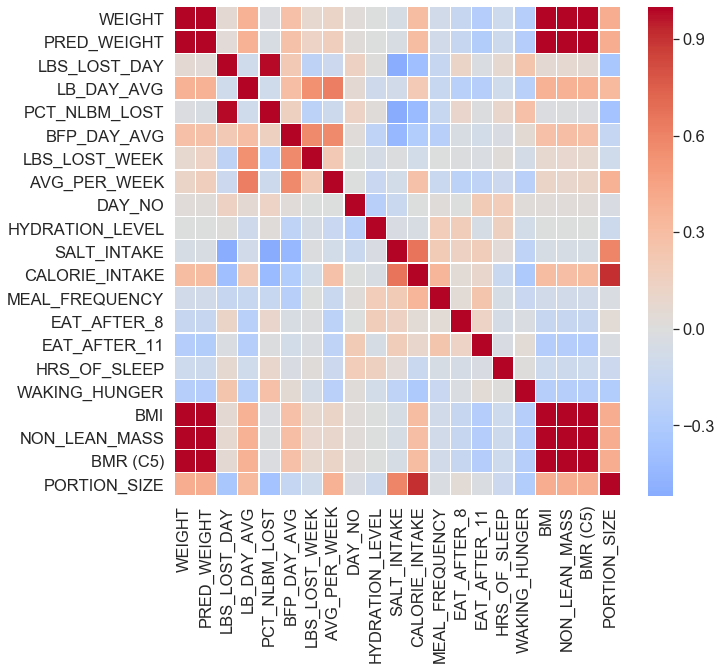

In [36]:
# Let's see how the variables correlate

corr = weight.corr()

plt.subplots(figsize = (10, 9))
sns.set(font_scale=1.5)

sns.heatmap(corr,\
            cmap = 'coolwarm',\
            center = 0,\
            square = False,\
            linewidths = .25)

In [21]:
corr['LBS_LOST_DAY'].sort_values(ascending = False)

LBS_LOST_DAY       1.000000
PCT_NLBM_LOST      0.987883
WAKING_HUNGER      0.239770
BFP_DAY_AVG        0.213637
DAY_NO             0.134437
EAT_AFTER_8        0.114296
HRS_OF_SLEEP       0.067463
NON_LEAN_MASS      0.063025
BMR (C5)           0.061406
BMI                0.061199
WEIGHT             0.061199
PRED_WEIGHT        0.032564
HYDRATION_LEVEL    0.008919
EAT_AFTER_11      -0.021737
LB_DAY_AVG        -0.094710
AVG_PER_WEEK      -0.128446
MEAL_FREQUENCY    -0.153334
LBS_LOST_WEEK     -0.211999
PORTION_SIZE      -0.327503
CALORIE_INTAKE    -0.390471
SALT_INTAKE       -0.514113
Name: LBS_LOST_DAY, dtype: float64

In [31]:
corr.to_csv('./corr.csv')

In [32]:
weight.to_csv('weight_EDA.csv')